# Fairness Checking: COMPAS Logistic Regression
Here, we create a logistic regression model for Fairness Checking, trained on the COMPAS dataset. The preprocessing for this dataset is done in a separate file. In this file, we train a model, evaluate its accuracy and examine the performance of the model with respect to our fairness criterion.

In [1]:
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


## Import and Split the Dataset
Our preprocessed dataset includes information about sex, age, and past and future criminal history. Each entry has 10 different features, and the label is the last column: risk_recid. 

risk_recid can take two different values: 0 or 1. 0 translates to the COMPAS labels 'Low' and 'Medium' and 1 translates to the COMPAS label 'High.' Reasoning for this is in the preprocessing file. We have a binary classification problem.

In [2]:
df = pd.read_csv('./../preprocessed_data/compas_risk_recid.csv')

In [3]:
df.head(5)

,Unnamed: 0,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,two_year_recid,c_charge_degree_F,c_charge_degree_M,risk_recid
0,0,1,69,0,0,0,0,0,0,1,0,0
1,1,1,34,1,0,0,0,0,1,1,0,0
2,2,1,24,1,0,0,1,4,1,1,0,0
3,5,1,44,0,0,0,0,0,0,0,1,0
4,6,1,41,0,0,0,0,14,1,1,0,1


In [4]:
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,two_year_recid,c_charge_degree_F,c_charge_degree_M,risk_recid
0,1,69,0,0,0,0,0,0,1,0,0
1,1,34,1,0,0,0,0,1,1,0,0
2,1,24,1,0,0,1,4,1,1,0,0
3,1,44,0,0,0,0,0,0,0,1,0
4,1,41,0,0,0,0,14,1,1,0,1


## Explore the Data
First, explore the label's (risk_recid) prevalence in the data.

In [5]:
df['risk_recid'].value_counts()

0    3414
1    2745
Name: risk_recid, dtype: int64

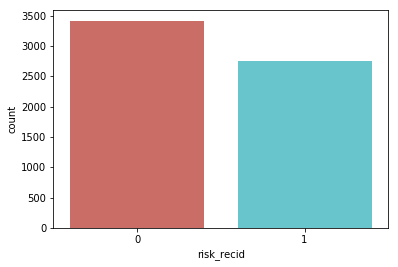

In [6]:
sns.countplot(x = 'risk_recid', data=df, palette='hls')

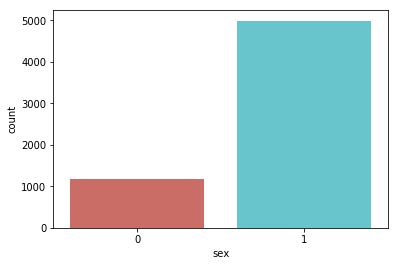

In [7]:
# Plot the marginal distribution on sex
sns.countplot(x = 'sex', data=df, palette='hls')

In [8]:
count_recid = len(df[df['risk_recid']==1])
count_no_recid = len(df[df['risk_recid']==0])
pct_recid = count_recid/(count_no_recid+count_recid)
print("Percentage of High Risk Recidivism:", pct_recid*100)
pct_no_recid = count_no_recid/(count_no_recid+count_recid)
print("Percentage of Low/Medium Risk Recidivism", pct_no_recid*100)

Percentage of High Risk Recidivism: 44.56892352654652
Percentage of Low/Medium Risk Recidivism 55.43107647345348


Now, explore each of the feature means to get a sense of the data.

In [9]:
df.groupby('risk_recid').mean()

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,two_year_recid,c_charge_degree_F,c_charge_degree_M
risk_recid,,,,,,,,,,
0,0.796134,37.779438,0.394259,0.008494,0.016110,0.042472,1.626538,0.314587,0.571178,0.428822
1,0.827322,30.487067,0.665209,0.122040,0.183971,0.193807,5.255373,0.629872,0.732605,0.267395


Text(0, 0.5, 'Frequency of Sex')

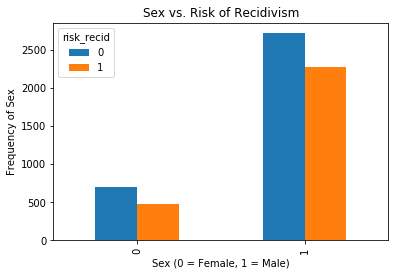

In [10]:
pd.crosstab(df.sex,df.risk_recid).plot(kind='bar')
plt.title('Sex vs. Risk of Recidivism')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency of Sex')

Text(0, 0.5, 'Frequency of Age')

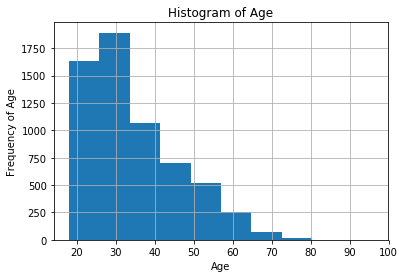

In [11]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Age')

Text(0, 0.5, 'Frequency of Age')

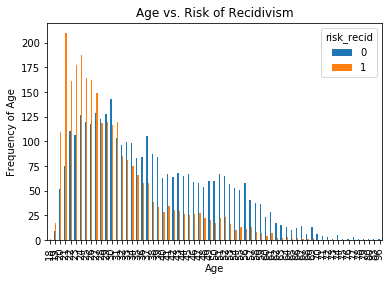

In [12]:
pd.crosstab(df.age,df.risk_recid).plot(kind='bar')
plt.title('Age vs. Risk of Recidivism')
plt.xlabel('Age')
plt.ylabel('Frequency of Age')

Text(0, 0.5, 'Frequency of Race')

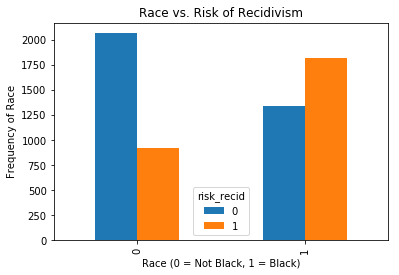

In [13]:
pd.crosstab(df.race,df.risk_recid).plot(kind='bar')
plt.title('Race vs. Risk of Recidivism')
plt.xlabel('Race (0 = Not Black, 1 = Black)')
plt.ylabel('Frequency of Race')

## Train the Model
We train a logistic regression model on the data.

In [14]:
y = df.pop('risk_recid')
X = df

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

4927
4927
1232
1232


In [17]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/sam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[550 126]
 [173 383]]


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       676
           1       0.75      0.69      0.72       556

   micro avg       0.76      0.76      0.76      1232
   macro avg       0.76      0.75      0.75      1232
weighted avg       0.76      0.76      0.76      1232



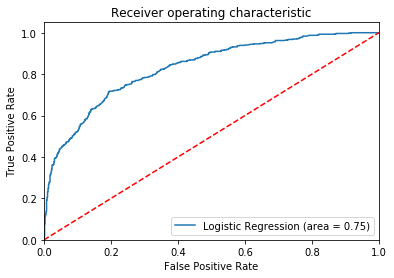

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

## Get Logits from Logistic Regression

In [23]:
logits = logreg.predict_proba(X_test)

In [24]:
logits

array([[0.89441334, 0.10558666],
       [0.49486266, 0.50513734],
       [0.65213553, 0.34786447],
       ...,
       [0.79015846, 0.20984154],
       [0.904076  , 0.095924  ],
       [0.25943062, 0.74056938]])

In [25]:
# We want the second column only (f(X))
f_X = logits[:,1]

In [26]:
len(f_X)

1232

In [27]:
f_X

array([0.10558666, 0.50513734, 0.34786447, ..., 0.20984154, 0.095924  ,
       0.74056938])

In [28]:
# Reappend true label, prediction label, and logits
X_test['risk_recid'] = y_test
X_test['prediction'] = y_pred
X_test['prediction_prob'] = f_X

/Users/sam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [29]:
X_test.head(5)

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,two_year_recid,c_charge_degree_F,c_charge_degree_M,risk_recid,prediction,prediction_prob
6,0,39,0,0,0,0,0,0,0,1,0,0,0.105587
4827,1,30,1,0,0,0,3,0,1,0,1,1,0.505137
2790,1,25,0,0,0,0,0,1,0,1,0,0,0.347864
2472,0,48,0,0,0,0,0,0,1,0,0,0,0.073724
3614,1,34,1,0,0,0,7,1,1,0,1,1,0.792835


In [30]:
len(X_test)

1232

In [31]:
X_test.to_csv('./../predicted_data/unfair_logreg_COMPAS.csv')

## Equalized Odds
We finally see if our classifier violates Equalized Odds, as expected. To do this, we graph the performance of the classifier on each of the combinations of Race (our sensitive attribute, A) and True Label (Y). This gives us:
- A = 0, Y = 0
- A = 0, Y = 1
- A = 1, Y = 0
- A = 1, Y = 1

From these combinations, we see the rate our model predicts (Y hat) 0, 1, 0, or 1, respectively. These rates are shown in the graph. As we can see clearly from our graph, our model violates EO as expected.

In [32]:
print(len(y_pred))
print(len(y_test))

1232
1232


In [33]:
# Prepare y_pred, y_test, race column
pred_labels = y_pred
true_labels = y_test.values
race_list = X_test['race'].values

In [34]:
def extract_race(test_data):
    race_list = []
    for sample in test_data:
        race_list.append(int(sample[2]))
    
    return np.asarray(race_list)

In [45]:
def equalized_odds(df):
    pred_labels = df['prediction']
    true_labels = df['two_year_recid']
    race_list = df['race']
    assert(len(race_list) == len(true_labels) == len(pred_labels))
    
    y0race0 = len(df[(df['two_year_recid'] == 0) & (df['race']==0)])
    y0race1 = len(df[(df['two_year_recid'] == 0) & (df['race']==1)])
    y1race0 = len(df[(df['two_year_recid'] == 1) & (df['race']==0)])
    y1race1 = len(df[(df['two_year_recid'] == 1) & (df['race']==1)])
    
    assert(y0race0 + y0race1 + y1race0 + y1race1 == len(pred_labels))
    
    y0race0_pred = len(df[(df['two_year_recid'] == 0) & (df['race']==0) & (df['prediction']==1)])
    y0race1_pred = len(df[(df['two_year_recid'] == 0) & (df['race']==1) & (df['prediction']==1)])
    y1race0_pred = len(df[(df['two_year_recid'] == 1) & (df['race']==0) & (df['prediction']==1)])
    y1race1_pred = len(df[(df['two_year_recid'] == 1) & (df['race']==1) & (df['prediction']==1)])
    
    # Finally, output a dictionary of the accuracies
    accuracies = {'race0Y0': y0race0_pred / float(y0race0), 
                  'race1Y0': y0race1_pred / float(y0race1),
                  'race0Y1': y1race0_pred / float(y1race0),
                  'race1Y1': y1race1_pred / float(y1race1)}
    return accuracies

In [46]:
# Helper function for plotting graph
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
            
def plot_hist(values, x_labels, title, x_label, y_label):
    y_series = pd.Series.from_array(values)
    
    # Plot the figure.
    plt.figure(figsize=(12, 8))
    ax = y_series.plot(kind='bar', color=['blue', 'orange', 'blue', 'orange'])
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticklabels(x_labels)
    plt.xticks(rotation=25)

    # Call the function above. All the magic happens there.
    add_value_labels(ax)

In [47]:
# Find Equalized Odds 
EO_dict = equalized_odds(X_test)

In [48]:
EO_values = list(EO_dict.values())
# EO_labels = list(EO_dict.keys())
EO_labels = ['notblack_notrecidividate (A = 0, Y = 0)', 'black_notrecidivate (A = 1, Y = 0)', 'notblack_recidivate (A = 0, Y = 1)', 'black_recidivate (A = 1, Y = 1)']

/Users/sam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.


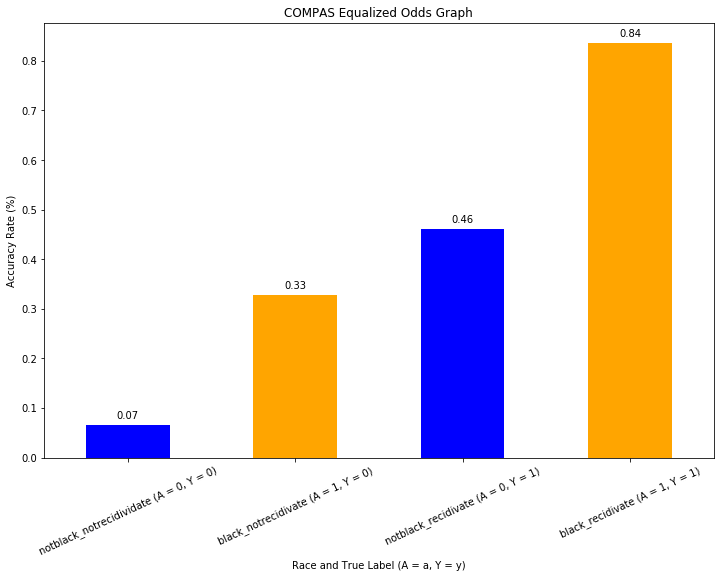

In [49]:
plot_hist(EO_values, EO_labels, 'COMPAS Equalized Odds Graph', 'Race and True Label (A = a, Y = y)', 'Accuracy Rate (%)')

## Statistical Parity

In [53]:
def extract_race(test_data):
    race_list = []
    for sample in test_data:
        race_list.append(int(sample[2]))
    
    return np.asarray(race_list)

In [56]:
def statistical_parity(df):
    pred_labels = df['prediction']
    true_labels = df['two_year_recid']
    race_list = df['race']
    assert(len(race_list) == len(true_labels) == len(pred_labels))
    
    race0 = len(df[df['race']==0])
    race1 = len(df[df['race']==1])
    race0pred = len(df[(df['race'] == 0) & (df['prediction']==1)])
    race1pred = len(df[(df['race'] == 1) & (df['prediction']==1)])
    
    # Finally, output a dictionary of the accuracies
    accuracies = {'race0': race0pred / float(race0), 
                  'race1': race1pred / float(race1)}
    
    return accuracies

In [57]:
# Find Statistical Parity 
SP_dict = statistical_parity(X_test)

In [58]:
SP_values = list(SP_dict.values())
# SP_labels = list(SP_dict.keys())
SP_labels = ['NOT black (A = 0)', 'black (A = 1)']

/Users/sam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.


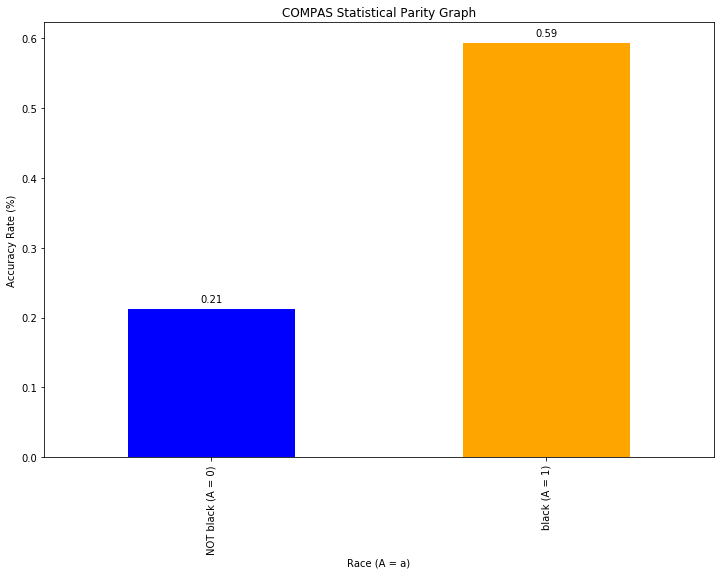

In [59]:
plot_hist(SP_values, SP_labels, 'COMPAS Statistical Parity Graph', 'Race (A = a)', 'Accuracy Rate (%)')